In [155]:
import pandas as pd
data = pd.read_csv('Iris.csv')


# change label to number
data['Species'] = data['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [156]:
import numpy as np
data = np.array(data)
#  shuffle the data
np.random.shuffle(data)

# one hot encoding
#  split the data into training and test data
train_data = data[:int(0.8*len(data))].T
X_train = train_data[1:5]
Y_train = train_data[5].astype(int)

test_data = data[int(0.8*len(data)):].T
X_test = test_data[1:5]
Y_test = test_data[5].astype(int)

X_Full = data.T[1:5]
Y_Full = data.T[5].astype(int)

print("X_train shape: " + str(X_train.shape))
print("Y_train shape: " + str(Y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("Y_test shape: " + str(Y_test.shape))
print("X_Full shape: " + str(X_Full.shape))
print("Y_Full shape: " + str(Y_Full.shape))



X_train shape: (4, 120)
Y_train shape: (120,)
X_test shape: (4, 30)
Y_test shape: (30,)
X_Full shape: (4, 150)
Y_Full shape: (150,)


In [157]:
import nn as nn
import matplotlib.pyplot as plt

#  create a neural network
# np.random.seed(100)
myNetwork = nn.NeuralNetwork(4, 3, 3)

#  train the network
costs, acc, best_epoch = myNetwork.train(X_Full, Y_Full, 200, 0.01)

Epoch 1/200 - train cost: 1.3827, train acc: 0.3333
Epoch 2/200 - train cost: 1.1738, train acc: 0.3333
Epoch 3/200 - train cost: 1.0019, train acc: 0.3333
Epoch 4/200 - train cost: 0.8685, train acc: 0.3333
Epoch 5/200 - train cost: 0.7704, train acc: 0.3267
Epoch 6/200 - train cost: 0.6992, train acc: 0.2467
Epoch 7/200 - train cost: 0.6454, train acc: 0.0867
Epoch 8/200 - train cost: 0.6023, train acc: 0.1800
Epoch 9/200 - train cost: 0.5656, train acc: 0.3200
Epoch 10/200 - train cost: 0.5332, train acc: 0.3333
Epoch 11/200 - train cost: 0.5040, train acc: 0.3333
Epoch 12/200 - train cost: 0.4772, train acc: 0.3333
Epoch 13/200 - train cost: 0.4525, train acc: 0.3333
Epoch 14/200 - train cost: 0.4297, train acc: 0.3333
Epoch 15/200 - train cost: 0.4087, train acc: 0.3333
Epoch 16/200 - train cost: 0.3894, train acc: 0.3333
Epoch 17/200 - train cost: 0.3716, train acc: 0.3333
Epoch 18/200 - train cost: 0.3552, train acc: 0.3333
Epoch 19/200 - train cost: 0.3403, train acc: 0.3333
Ep

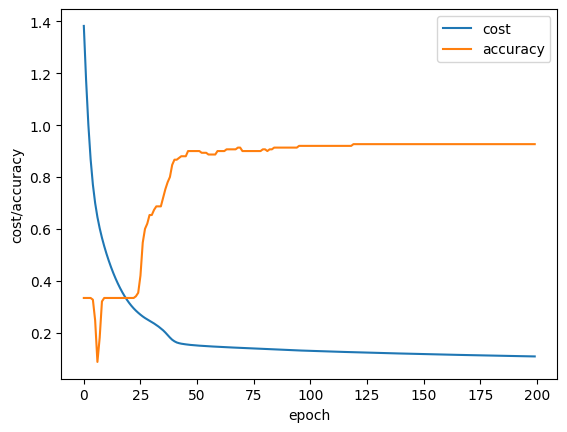

In [158]:
# plot the cost and accuracy in one graph
plt.plot(costs, label='cost')
plt.plot(acc, label='accuracy')
plt.xlabel('epoch')
plt.ylabel('cost/accuracy')
plt.legend()
plt.show()

In [159]:
Z1, A1, Z2, A2 = myNetwork.forward(X_Full)
print("A2: ", A2.shape)
print("Y_Full: ", Y_Full.shape)

A2:  (3, 150)
Y_Full:  (150,)


In [160]:
#  calculate the cost
cost = -np.mean(Y_Full * np.log(A2 + 1e-8))
print("cost: ", cost)

cost:  2.1617237080909004


In [161]:
Y_one =myNetwork.one_hot_encode(Y_Full)
print("Y_one: ", Y_one.shape)

cost2 = -np.mean(Y_one * np.log(A2 + 1e-8))
print("cost2: ", cost2)


Y_one:  (3, 150)
cost2:  0.10769798053430539
